# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [2]:


from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
import math
warnings.filterwarnings('ignore')
%matplotlib inline

In [70]:
#data.head()
data.shape

(4870, 65)

In [71]:
data = pd.io.stata.read_stata('us_job_market_discrimination.dta')
data.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,...,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,3.618480,3.661396,7.842916,0.052772,0.411499,0.097125,0.448049,215.637782,3.481520,0.559548,...,0.106776,0.437166,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.714997,1.219126,5.044612,0.223601,0.492156,0.296159,0.497345,148.127551,2.038036,0.496492,...,0.308866,0.496083,0.259649,0.275854,0.171677,0.278932,0.410141,0.442847,0.361773,0.371308
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,44.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


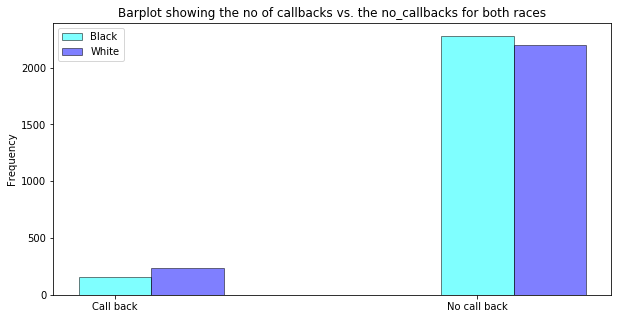

In [67]:
w = data[data.race=='w']
b = data[data.race=='b']

# number of callbacks for black-sounding names
n_black=sum(b.call)
n_tot_black=len(b.call)

#number of no callbacks for black-sounding names:
n_nocall_black=n_tot_black-n_black
#print(n_black,n_nocall_black)

#number of callbacks for white sounding names
n_white=sum(w.call)
n_tot_white=len(w.call)

#number of no callbacks for white-sounding names:
n_nocall_white=n_tot_white-n_white
#print(n_white,n_nocall_white)


#Visually:

plt.figure(figsize=(10,5))
x1= [ 'Call back', 'No call back']
x2=[.2,1.2]
y=[n_black,n_nocall_black]
z=[n_white,n_nocall_white]
_=plt.bar(x1,y,width = barwidth,color = 'cyan', edgecolor = 'black',label='Black',alpha=0.5)
_=plt.bar(x2,z,width=barwidth,color='blue',edgecolor='k',label='White',alpha=0.5)
plt.ylabel('Frequency')
plt.title('Barplot showing the no of callbacks vs. the no_callbacks for both races')
plt.legend()
plt.show()

We can see that the call back numbers depend on the race information. At least from the above plot, we see a difference in number.

## Qestion no 1: 

* **What test is appropriate for this problem? Does CLT apply?**

Two-sample t-test is appropiate because we are trying to determine if two population means are equal.</br>
CLT applies because our sample size is large enough, where n > 30 (n = 4870). And the observations are independent.

## Question no 2: 

* **What are the null and alternate hypotheses?**

**Null Hypothesis:** The mean difference between the callback rates for black & white-sounding names is zero. </br>

**Alternative Hypothesis:** There is a significant (non-zero) difference between callback rates for black & white-sounding names.



## Question no 3:

* **Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.**

* **Frequentist method:**

In [100]:


# black sample size
n_b = len(data[data['race'] == 'b']) 

# white sample size
n_w = len(data[data['race'] == 'w'])

# black callback rate
p_b = sum(data[data['race'] == 'b'].call)/n_b 
std_b = np.sqrt((p_b*(1-p_b))/len(b))

# white callback rate
p_w = sum(data[data['race'] == 'w'].call)/n_w 
std_w = np.sqrt((p_w*(1-p_w))/len(w))

# Calculate difference of proportion and standard deviation
p_diff = p_w - p_b
std_diff = np.sqrt((std_w)**2 + (std_b)**2)


# Use z = 1.96 to calculate margin of error for a 95% confindence interval
margin_error = 1.96 * std_diff
conf_int =  [(p_diff - margin_error), (p_diff + margin_error)]

# Print the results
print('Difference in proportions =', p_diff)
print("Margin of error = ", margin_error)
print('95% Confidence interval =', conf_int)


Difference in proportions = 0.032032854209445585
Margin of error =  0.015255406349886438
95% Confidence interval = [0.016777447859559147, 0.047288260559332024]


* **Bootstrapping method:**

From CLT, we can consider that the difference of proportions of black and white sounding names to be normally distributed. After generating 10,000 differences in callback rates, we can visualize how statistically reasonable it is that the true difference is zero.

difference in the proportion of callbacks = 0.032032854209445585
95% confidence interval = [0.01671117 0.0473983 ]
z-score = 4.11555043573
p-value = 1.9312826037620745e-05


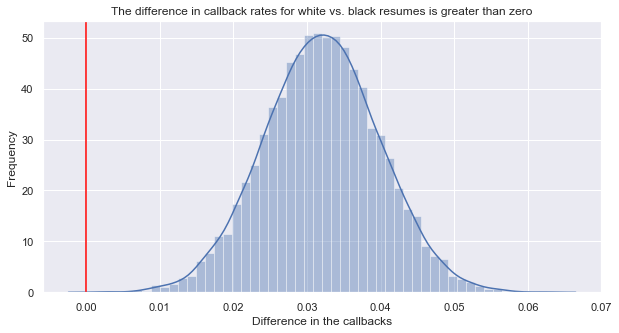

In [107]:
#Bootsrapping
np.random.seed(42)
# Sample normal distribution of proportion difference
distrib_diff = np.random.normal(p_diff, std_diff, 10000)

# Calculate the z-score for a difference = 0
z_score = (p_diff - 0) / std_diff

# Calculate p-value
p = stats.norm.cdf(z_score)

# Compute 95% confidence interval with bootstrapping
conf_int_bs = np.percentile(distrib_diff, [2.5, 97.5])

# Print the results
print('difference in the proportion of callbacks =', p_diff)
print('95% confidence interval =', conf_int_bs)
print('z-score =', z_score)
print('p-value =', (1-p))

# visualization of the difference in callback proportions:
sns.set(color_codes=True)

fig = plt.figure(figsize=(10,5))
_ = sns.distplot(distrib_diff,color='b')
_ = plt.axvline(x=0, color='red')

plt.title('The difference in callback rates for white vs. black resumes is greater than zero')
plt.xlabel('Difference in the callbacks')
plt.ylabel('Frequency')
plt.show()

So what we see is, the p-value = 1.93 e-5 and 95% confidence interval = [0.01654557 0.0472137] for the difference between the two.

## Question no 4:

* **Write a story describing the statistical significance in the context or the original problem.**

As we have seen, that the p-value is less than 0.05 and the confidence interval does not contain 0. We can definitely conclude that, there is a statistically significant difference between the callback rates of black and white-sounding names.

## Question no 5:
* **Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?**

No, the conclusion above does not imply that the race is the most important factor in callback success. Actually, We have not analyzed any other features like education, years of experience etc. which sound more promising towards the callback success. We need to consider them in our study in order to conclude the *most important* factor.